In [ ]:
# Point to get across
# What is K-Means
# K Cluster Selection - Elbow Method
# K-Means Use case
# Show how the algo works --> Show how to scale features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataFrame = pd.read_csv('../data/price_zone.csv')
priceZone = dataFrame.copy()

In [3]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


### DataDict
- price_elasticity = price drop vs increasing sale
- avg_weekly_txn = average number of receipt per week
- avg_unit_retail = price per receipt

In [4]:
priceZone.describe()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,104166.528529,-2.623994,87370.028028,8365.742307,8.921802
std,55788.861500,0.799776,35578.135917,6702.604205,3.520830
min,10290.000000,-4.000000,25110.000000,414.720000,3.000000
25%,54387.500000,-3.300000,56908.500000,3668.365080,5.710000
50%,104843.000000,-2.620000,85138.000000,6782.380952,8.990000
75%,152671.500000,-1.960000,117500.000000,10651.753470,11.985000
max,199970.000000,-1.210000,149965.000000,39291.200000,14.990000


In [17]:
# this retail chain can only manage up to 20 price zones

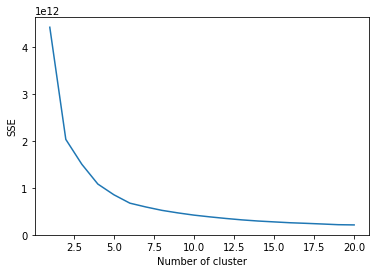

In [5]:
# Explain SSE
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone.drop(columns=['store']))
    priceZone["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

SSE = error from centroid on each group
Find Number of cluster that has less decresing SSE


In [6]:
print(sse)
# for k in range(1,11):
#     print(str(k) + ': ' + str(sse[k] - sse[k+1]))

{1: 4414279487443.367, 2: 2029088130470.8276, 3: 1500089091227.231, 4: 1079279655563.1946, 5: 851770528735.0387, 6: 672818716024.0381, 7: 591700149266.8601, 8: 519940984494.5162, 9: 465851329565.45056, 10: 418464770413.7385, 11: 381085650920.209, 12: 347274077151.4602, 13: 317241482817.27094, 14: 293088407207.448, 15: 274577302866.39432, 16: 256401578367.76633, 17: 243835589325.99493, 18: 229924785919.51486, 19: 215061105965.7437, 20: 210292885957.64716}


# Choose 14 Clusters

In [7]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone.drop(columns=['store']))
priceZone["clusters"] = kmeans.labels_
priceZone.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,116643.171429,-2.652000,43349.728571,8599.920415,8.085857
1,31688.323810,-2.740476,85763.676190,2434.495421,9.537619
2,148324.263158,-2.664737,121992.263158,10771.736116,8.745000
3,179380.347826,-2.654493,90449.594203,14727.385628,9.274783
4,28537.298507,-2.549701,131816.328358,2167.026411,8.996269
5,75913.661765,-2.581471,44790.044118,6733.126849,9.192206
6,184123.887097,-2.693710,48961.387097,14677.734197,8.493226
7,184541.288136,-2.698475,132766.186441,16619.485691,9.000847
8,108427.264706,-2.567941,129514.529412,8222.477888,8.546912


## Cannot do a price zone because 	price_elasticity's value are the same
To solve this by scaling data --> normalization

In [88]:
# radar plot

## Scale the data : Normalization

In [14]:
priceZone_normalized = dataFrame.copy()

priceZone_normalized_store = priceZone_normalized['store']
priceZone_normalized.drop(columns=['store'], inplace=True)

priceZone_normalized = (priceZone_normalized - priceZone_normalized.mean())/priceZone_normalized.std()

priceZone_normalized['store'] = priceZone_normalized_store
priceZone_normalized.head()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,store
0,-1.646808,-0.782727,0.744220,-1.160797,-0.051636,s1001
1,-1.426101,0.730197,-0.553234,-1.101289,1.655348,s1002
2,-0.683372,-1.320377,0.648656,-0.153335,0.746471,s1003
3,-0.703627,0.180043,-1.345265,-0.844608,-0.974714,s1004
4,0.861686,1.542925,-0.402804,1.023208,0.002328,s1005


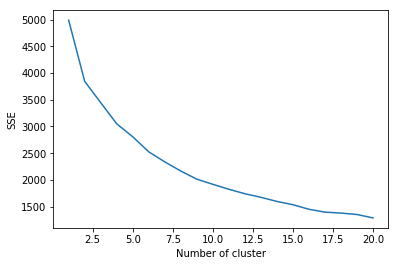

In [15]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone_normalized.drop(columns=['store']))
    priceZone_normalized["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [16]:
print(sse)

{1: 4989.999999999996, 2: 3845.6481377485497, 3: 3446.429988312818, 4: 3050.0674282619425, 5: 2807.1264134438834, 6: 2524.9015348875873, 7: 2337.454049832037, 8: 2165.523652622599, 9: 2013.2087560421967, 10: 1916.849550095646, 11: 1824.1978371656178, 12: 1740.637359091218, 13: 1673.3950705336297, 14: 1596.2103370278305, 15: 1534.8823918441276, 16: 1449.380294901246, 17: 1395.716005617057, 18: 1378.0872354024514, 19: 1351.1535386269027, 20: 1287.5525985114284}


In [17]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone_normalized.drop(columns=['store']))
priceZone_normalized["clusters"] = kmeans.labels_
priceZone_normalized.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,0.869396,0.616250,-0.185164,0.309125,0.149431
1,-0.744390,0.923108,-0.935184,-0.623264,-0.922474
2,0.894463,-0.703660,0.707278,1.170321,-0.253794
3,-0.761160,-1.030072,-0.621840,-0.649061,-0.688141
4,-0.828288,-0.761418,-0.903147,-0.625696,1.000613
5,-0.612937,0.825085,0.782264,-0.449697,-1.011353
6,-0.826427,1.004857,-0.604356,-0.605217,0.906471
7,-0.836373,-0.816691,0.714432,-0.604354,0.989291
8,0.828679,0.130029,-1.002068,0.344153,-0.374274


In [13]:
# priceZone.drop(columns=['clusters'], inplace=True)
priceZone = pd.merge(priceZone, priceZone_normalized[["store", "clusters"]], on=['store'])
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,clusters_x,clusters_y
0,s1001,12293,-3.25,113848,585.380952,8.74,4,1
1,s1002,24606,-2.04,67687,984.240000,14.75,1,12
2,s1003,66042,-3.68,110448,7338.000000,11.55,11,5
3,s1004,64912,-2.48,39508,2704.666667,5.49,5,11
4,s1005,152239,-1.39,73039,15223.900000,8.93,13,13


In [61]:
priceZone.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,155338.105263,-2.536447,56823.421053,11362.574266,5.416579
1,52722.238806,-1.903881,68330.880597,4109.745480,12.221045
2,73067.500000,-1.851667,55393.984848,4993.473377,5.609697
3,139988.808333,-3.517750,111848.916667,10670.815934,10.136500
4,49701.663043,-3.292283,116319.239130,3335.866743,8.708370
5,149904.258621,-2.297759,125867.862069,10310.671439,6.019655
6,147477.569444,-2.918333,47092.777778,11614.837473,11.151111
7,61173.082192,-1.982192,114077.739726,4586.869344,5.264384
8,166912.285714,-2.144821,91682.178571,27319.774263,7.658036


In [ ]:
# maybe add radar graph??

In [16]:
# Export Preped Data to file
outputDF.to_csv('../data/store_cluster.csv', index=False)